In [13]:
# Import modules
import starwrap as sw
from matplotlib.ticker import MaxNLocator
from numpy.testing import assert_array_almost_equal
from start_space import current_directory

In [14]:
# Import model
arg = sw.args()
arg.trainMode = 2
arg.thread = 20
arg.normalizeText = True
arg.verbose = True

sp = sw.starSpace(arg)
sp.initFromTsv(f'{current_directory}/../data/StarSpace_data/models/model.tsv')

In [15]:
# Run PCA on Model and data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

with open(f'{current_directory}/../data/StarSpace_data/twitter_train130k.txt', 'r', encoding='utf-8') as items:
    sentences = [x.split('\t')[0] for x in items]

X = np.array([np.array(sp.getDocVector(x, ' '))[0] for x in sentences])
X_std = StandardScaler().fit_transform(X)


num_components = 160
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_std)
proj = pca.inverse_transform(X_train_pca)
print(proj)
# plt.bar(range(num_components), pca.explained_variance_ratio_ * 100)
# plt.xlabel("Principal Components")
# plt.ylabel("Percentage of explained variance")
# plt.show()

[[ 0.9461175  -0.7171382   0.10628412 ...  0.09202605  2.10498
   1.9937679 ]
 [-0.00270765  0.06931597  0.08428953 ...  0.03649301 -0.00755402
  -0.03489939]
 [-1.0565373   1.1905173   0.4086509  ... -0.75042725 -0.43914074
   0.7015984 ]
 ...
 [-0.55237335  0.47533357 -0.9727962  ...  0.3228006   1.4668758
   0.3559966 ]
 [-0.07561512  1.3267888  -0.20674618 ... -0.13514963  0.7340973
  -0.22668739]
 [-0.95145327  0.6943088   0.3425907  ...  0.24914469 -0.7305072
   0.41398343]]


In [20]:
X_std = StandardScaler().fit_transform(X)
cov_mat = np.cov(X.T)
# Compute the eigen values and vectors using numpy
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Hardcode it as log(number of partitions)
num_vec_to_keep = 4

# Compute the projection matrix based on the top eigen vectors
num_features = X.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
  proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

proj_mat

array([[ 0.03945694, -0.00385705,  0.17168504, -0.05764049],
       [-0.09938709, -0.03184601,  0.02278215,  0.00979866],
       [-0.10050216,  0.05651736, -0.03669673,  0.00242504],
       ...,
       [ 0.03195885, -0.04132186,  0.02317739,  0.00917384],
       [ 0.03025906, -0.03600888,  0.03928636, -0.06945444],
       [-0.03323095,  0.02422033, -0.01305462, -0.07390465]])

In [21]:
np.save(f'{current_directory}/../data/StarSpace_data/projection_matrix', proj_mat)

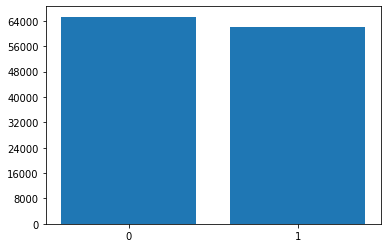

In [16]:
partitions = []
for y in X_train_pca:
    bits = y > 0
    partition = 0
    if bits[0]:
        partition = 1
    partitions.append(partition)

labels, counts = np.unique(partitions, return_counts=True)
plt.bar(labels, counts, align='center')
ax = plt.gca()
ax.set_xticks(labels)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()